# 📌 형태소 분석

### ✏️ 파일 읽기

In [85]:
import os
import pymongo

# DB 연결
conn = pymongo.MongoClient()

db = conn["soaeng"]
collection = db.subtitle

# 파일 읽기
def read_txt_file(file_name):
  # print("[파일명] " + file_name)
  text = ""
  
  # 파일 열기
  with open(file_path + file_name, "r", encoding="utf-8") as txt_file:
    # 파일 라인별로 텍스트만 추출
    for line in txt_file:
      line = line.strip()
      text += line
  return text

file_path = "C:\\Users\\sodud\\study\\ssafy_spec_pjt\\subtitle\\data\\refined_text\\"

# 자막 파일 폴더
file_list = os.listdir(file_path)
# print(file_list)
# 자막 파일 목록
txt_files = [txt_file for txt_file in file_list]

# 파일 내용 저장할 리스트
text_list = []

# 파일 읽고 내용 저장
for txt_file in txt_files:
  text_list.append(read_txt_file(txt_file))
  subtitle = {"filename": txt_file, "content": read_txt_file(txt_file)}
  # DB에 저장(이미 저장된 파일이면 내용 업데이트, 없으면 삽입)
  collection.update_one(subtitle, { '$set': subtitle }, upsert=True)

# print(text_list)
print(len(text_list))
print(collection.estimated_document_count())

(1988) Grave of the Fireflies~Hotaru no Haka (720p Blu-ray 8bit Dual Audio) [NoobSubs] [3E904CC4].txt
(Netflix) Episode 298.txt
(Netflix) Episode 299.txt
(Netflix) Episode 300.txt
(Netflix) Episode 301.txt
(Netflix) Episode 302.txt
(Netflix) Episode 303.txt
(Netflix) Episode 304.txt
(Netflix) Episode 305.txt
(Netflix) Episode 306.txt
(Netflix) Episode 307.txt
(Netflix) Episode 308.txt
(Netflix) Episode 309.txt
(Netflix) Episode 310.txt
(Netflix) Episode 311.txt
(Netflix) Episode 312.txt
(Netflix) Episode 313.txt
(Netflix) Episode 314.txt
(Netflix) Episode 315.txt
(Netflix) Episode 316.txt
(Netflix) Episode 317.txt
(Netflix) Episode 318.txt
(Netflix) Episode 319.txt
(Netflix) Episode 320.txt
(Netflix) Episode 321.txt
(Netflix) Episode 322.txt
(Netflix) Episode 323.txt
(Netflix) Episode 324.txt
(Netflix) Episode 325.txt
(Netflix) Episode 326.txt
(Netflix) Episode 327.txt
(Netflix) Episode 328.txt
(Netflix) Episode 329.txt
(Netflix) Episode 330.txt
(Netflix) Episode 331.txt
(Netflix) Epis

### ✏️ 불용어 제거

In [77]:
import re

# 불용어 리스트 생성
stop_words = []
with open("stop_words_japanese.txt", "r", encoding="UTF8") as f :
  lines = f.readlines()
  stop_words = [stop_word.strip() for stop_word in lines]

# 생성된 불용어 리스트 확인
print("불용어: ", stop_words)

불용어:  ['あそこ', 'あっ', 'あの', 'あのかた', 'あの人', 'あり', 'あります', 'ある', 'あれ', 'い', 'いう', 'います', 'いる', 'う', 'うち', 'え', 'お', 'および', 'おり', 'おります', 'か', 'かつて', 'から', 'が', 'き', 'ここ', 'こちら', 'こと', 'この', 'これ', 'これら', 'さ', 'さらに', 'し', 'しかし', 'する', 'ず', 'せ', 'せる', 'そこ', 'そして', 'その', 'その他', 'その後', 'それ', 'それぞれ', 'それで', 'た', 'ただし', 'たち', 'ため', 'たり', 'だ', 'だっ', 'だれ', 'つ', 'て', 'で', 'でき', 'できる', 'です', 'では', 'でも', 'と', 'という', 'といった', 'とき', 'ところ', 'として', 'とともに', 'とも', 'と共に', 'どこ', 'どの', 'な', 'ない', 'なお', 'なかっ', 'ながら', 'なく', 'なっ', 'など', 'なに', 'なら', 'なり', 'なる', 'なん', 'に', 'において', 'における', 'について', 'にて', 'によって', 'により', 'による', 'に対して', 'に対する', 'に関する', 'の', 'ので', 'のみ', 'は', 'ば', 'へ', 'ほか', 'ほとんど', 'ほど', 'ます', 'また', 'または', 'まで', 'も', 'もの', 'ものの', 'や', 'よう', 'より', 'ら', 'られ', 'られる', 'れ', 'れる', 'を', 'ん', '何', '及び', '彼', '彼女', '我々', '特に', '私', '私達', '貴方', '貴方方']


### ✏️ 형태소 분석

In [6]:
# coding=utf-8

import sys
import MeCab

sentence = ""
file_path = "C:\\Users\\sodud\\study\\ssafy_spec_pjt\\subtitle\\data\\refined_text\\"
file_name = "Ni_Ten_Yonsan_Seiin_Koukou_Danshi_Volley-bu_001.txt"
text = open(file_path + file_name, "r", encoding="UTF8")
for line in text:
  sentence += line
  
try:
  # 품사 분석
  # tagger = MeCab.Tagger()
  # tagger = MeCab.Tagger("-O wakati")
  tagger = MeCab.Tagger("-F%m\\t --unk-feature 未知語")
  
  # 기본 출력 결과
  # print(tagger.parse(sentence))
  
  # 토큰화
  m = tagger.parseToNode(sentence)
  while m:
    feature = m.feature.split(",")
    print(m.surface, "\t", feature[0])
    m = m.next
  print("EOS")
  
  # 일본어 사전 정보 출력
  d = tagger.dictionary_info()
  while d:
    print("filename: %s" % d.filename)
    print("charset: %s" %  d.charset)
    print("size: %d" %  d.size)
    print("type: %d" %  d.type)
    print("lsize: %d" %  d.lsize)
    print("rsize: %d" %  d.rsize)
    print("version: %d" %  d.version)
    d = d.next


except RuntimeError as e:
    print("RuntimeError:", e)

 	 BOS/EOS
( 	 補助記号
部員 	 名詞
) 	 補助記号
レフト 	 名詞
持っ 	 動詞
て 	 助詞
こい 	 動詞
！ 	 補助記号
( 	 補助記号
保護 	 名詞
者 	 接尾辞
たち 	 接尾辞
) 	 補助記号
惜しい 	 形容詞
！ 	 補助記号
( 	 補助記号
灰 	 名詞
島 	 接尾辞
) 	 補助記号
《 	 補助記号
全然 	 副詞
惜しく 	 形容詞
ねえ 	 形容詞
》 	 補助記号
《 	 補助記号
レフト 	 名詞
オープン 	 名詞
に 	 助動詞
また 	 副詞
３ 	 未知語
枚 	 接尾辞
》 	 補助記号
( 	 補助記号
灰 	 名詞
島 	 接尾辞
) 	 補助記号
くっ 	 感動詞
… 	 補助記号
｡( 	 未知語
小向 	 名詞
) 	 補助記号
すま 	 動詞
ん 	 助動詞
！ 	 補助記号
( 	 補助記号
井川 	 名詞
) 	 補助記号
ハァ 	 感動詞
ハァ 	 感動詞
… 	 補助記号
｡( 	 未知語
監督 	 名詞
) 	 補助記号
サーブ 	 名詞
カット 	 名詞
！ 	 補助記号
下がれ 	 動詞
！ 	 補助記号
うっ 	 感動詞
！ 	 補助記号
《 	 補助記号
保護 	 名詞
者 	 接尾辞
会 	 名詞
なんて 	 助詞
勝っ 	 動詞
て 	 助詞
黙ら 	 動詞
せれ 	 助動詞
ば 	 助詞
いい 	 形容詞
》 	 補助記号
《 	 補助記号
部活 	 名詞
に 	 助詞
来 	 動詞
ない 	 助動詞
の 	 助詞
は 	 助詞
爽 	 名詞
太 	 名詞
の 	 助詞
問題 	 名詞
だ 	 助動詞
》 	 補助記号
《 	 補助記号
俺 	 代名詞
は 	 助詞
何 	 代名詞
も 	 助詞
間違っ 	 動詞
て 	 助動詞
ない 	 助動詞
》 	 補助記号
《 	 補助記号
何 	 代名詞
も 	 助詞
！ 	 補助記号
》[ 	 未知語
外 	 接尾辞
: 	 補助記号
6 	 未知語
D 	 未知語
5 	 未知語
AA 	 未知語
3 	 未知語
FF 	 未知語
99 	 未知語
A 	 未知語
144 	 未知語
BD 	 未知語
5138562787 	 未知語
F 	 未知語
58590 	 未知語
]( 	 未知語
バイブレータ

### ✏️ 일본어 불용어 목록을 위한 라이브러리 설치
단, 수동으로 불용어 목록 추가 필요(일본어 지원 X)

In [64]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sodud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [78]:
import MeCab
import neologdn
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

tagger = MeCab.Tagger("-F%m\\t --unk-feature 未知語")

CONTENT_WORD_POS = ("名詞", "動詞", "形容詞", "副詞", "未知語")
IGNORE = ("接尾", "非自立", "代名詞")

def is_content_word(feature):
  return feature.startswith(CONTENT_WORD_POS) and all(f not in IGNORE for f in feature.split(",")[:6])

for i in text_list:
  text += i

text = neologdn.normalize(text, repeat=2)


#some more noise removal
text = "".join([i for i in text if i.isalpha() or i.isspace()])
result = tagger.parseToNode(text)
print(result)

stop_words = stopwords.words("japanese")

content_words = []

while result:
  if is_content_word(result.feature):
    # print(result.surface + "\t" + result.feature)
    lemma = result.feature.split(",")[10] if len(result.feature.split(",")) > 6 and result.feature.split(",")[6] != "*" else result.surface
    if lemma not in stop_words:
      content_words.append((lemma))
  result = result.next

print(content_words)
fdist = FreqDist(content_words)
fdist.plot(10, cumulative=False)

KeyboardInterrupt: 

In [48]:
from collections import Counter


# 포함 품사: 명사, 동사, 형용사, 부사, 고유명사
CONTENT_WORD_POS = ("名詞", "動詞", "形容詞", "副詞", "未知語")
# 제외 품사: 접미사, 비자립, 대명사, 보조기호
IGNORE = ("接尾", "非自立", "代名詞")

# def is_content_word(feature):
#   return feature.startswith(CONTENT_WORD_POS)
def is_content_word(feature):
    return feature.startswith(CONTENT_WORD_POS) and all(f not in IGNORE for f in feature.split(",")[:6])

content_words = []

for text in text_list:
  
  # 토큰화
  m = tagger.parseToNode(text)
  
  while m:
    # 해당되는 단어만 뽑기
    if is_content_word(m.feature):
      word = m.feature.split(",")[7] if len(m.feature.split(",")) > 6 and m.feature.split(",")[6] != "*" else m.surface
      if word not in stop_words:
        content_words.append((word))
    m = m.next

print(content_words)
# 빈도수 계산
count = Counter(content_words)

# 단어와 빈도수 딕셔너리 저장 리스트
word_count = []
words = []

for word, cnt in count.most_common():
  dics = {"word": word, "count": cnt}
  if len(dics["word"]) >= 2 and len(words) <= 99:
    word_count.append(dics)
    words.append(dics["word"])

# 단어, 빈도수 출력
# for word in word_count:
#   print("{}\t{}".format(word["word"], word["count"]))

print(word_count)
# print(words)
# print(len(words))

['１９２３', '年', 'カントウ', '震災', '起こる', '時', 'ベルギー-Belgie', '躊躇う', '救援', '活動', '行う', '資金', '集め', '為る', '為る', '友好', '日本', '関係', '為', '言う', '王族', '設立', '為る', 'ベルギー-Belgie', '国内', '委員', '会', '協力', '為る', '規模', '救援', '活動', '実施', '為る', '故郷', 'アントワープ-Antwerp', '含む', 'ベルギー-Belgie', '全国', '各地', '教会', '戦争', '退役', '軍人', '協力', '為る', 'Japan', 'Day', '言う', '催し', '行う', '他', 'ベルギー-Belgie', '芸術', '作品', '集める', '新作', '発表', '為る', '為る', '貢献', '為る', '先ず', 'ブリュッセル-Bruxelles', '次', '日本', '作品', '展示', '発売', '展覧', '会', '開催', '為る', '売り上げ', '入場', '利益', '全て', '救援', '活動', '為', '寄付', '為る', '日本', '展覧', '会', '3', '万', '五千', '観客', '訪れる', '報告', '為る', '居る', '上', '日本', '皇太子', '皇后', '30', '点', '芸術', '購入', '為る', '聞く', '居る']
[{'word': '為る', 'count': 13}, {'word': 'ベルギー-Belgie', 'count': 4}, {'word': '日本', 'count': 4}, {'word': '救援', 'count': 3}, {'word': '活動', 'count': 3}, {'word': '行う', 'count': 2}, {'word': '言う', 'count': 2}, {'word': '協力', 'count': 2}, {'word': '芸術', 'count': 2}, {'word': '作品', 'count': 2}, {'word': '展覧', 'coun

In [9]:
counts = []
for i in word_count:
  # print(i["count"])
  counts.append(i["word"])

### ✏️ 데이터 시각화

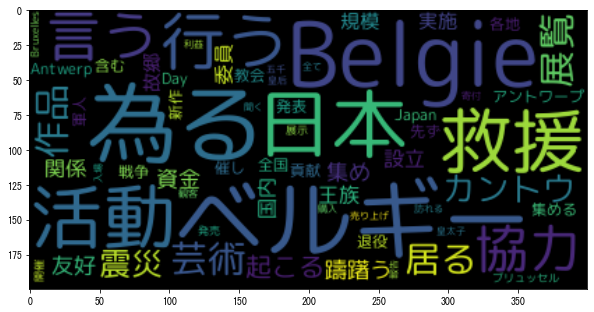

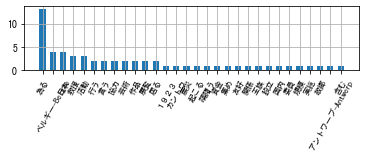

<Figure size 720x720 with 0 Axes>

In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from wordcloud import WordCloud

# 폰트 경로 설정
font_path = "C:/Users/sodud/study/ssafy_spec_pjt/subtitle/MPLUSRounded1c-Regular.ttf"

# 딕셔너리화
def pairing_word_cnt(word_count):
  wordInfo = dict()
  for i in word_count:
    wordInfo[i["word"]] = i["count"]
  return wordInfo

# 데이터 시각화(막대 그래프)
def show_bar_chart(font_path, data):
  # 폰트 설정
  font_name = fm.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc").get_name()
  plt.rc("font", family=font_name)
  
  # 30개씩의 데이터만
  x = list(data.keys())[:30]
  y = list(data.values())[:30]
  
  # 그래프 비율
  ax = plt.subplot(3, 1, 1)
  
  # 막대 설정
  plt.bar(x, y, width=.6)
  plt.grid(True)
  # x축 레이블 설정
  plt.xticks(fontsize=8, rotation=60)
  
  # 그래프 이미지 사이즈 설정
  plt.figure(figsize=(10, 10))
  plt.show()

# 데이터 시각화(워드 클리우드)
def show_wordcloud(font_path, data):
  # wordcloud = WordCloud(font_path).generate(" ".join(data))
  wordcloud = WordCloud(font_path).generate(" ".join(data))
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()

show_wordcloud(font_path, words)
show_bar_chart(font_path, pairing_word_cnt(word_count))

### ✏️ 단어 DB에 저장

In [ ]:
import pymongo

# DB 연결
conn = pymongo.MongoClient()

db = conn["chuanyone"]
collection = db.voca

